In [1]:
import pandas as pd

In [2]:
neighborhoods = pd.read_csv("Neighborhoods.csv")
hoodsdict = neighborhoods['hood'].value_counts().to_dict()
neighborhoods.set_index('hood')

fire = pd.read_csv("firearm-seizures.csv")
firedict = fire['neighborhood'].value_counts().to_dict()

arrest = pd.read_csv("arrest-data.csv")
arrestdict = arrest['INCIDENTNEIGHBORHOOD'].value_counts().to_dict()

policeblotter = pd.read_csv("police-blotter.csv")
policedict = policeblotter['INCIDENTNEIGHBORHOOD'].value_counts().to_dict()

scores = hoodsdict

#this section of for loops cleans the data to make sure all of the neighborhoods have the same name for every dataset
for key in arrestdict:
    if key.startswith('Mt. Oliver Neighborhood'):
        arrestdict['Mt. Oliver'] = arrestdict.pop(key)
        break
        
for key in arrestdict:
    if key.startswith('Mount Oliver'):
        arrestdict['Mt. Oliver'] = arrestdict['Mt. Oliver'] + arrestdict.pop(key)
        break
        
for key in policedict:
    if key.startswith('Mount Oliver'):
        policedict['Mt. Oliver'] = policedict.pop(key)
        
for key in policedict:
    if key.startswith('Central North Side'):
        policedict['Central Northside'] = policedict.pop(key)

#combines single neighborhoods that were separated into one neighborhood
arrestdict['Troy Hill'] = arrestdict['Troy Hill'] + arrestdict.pop('Troy Hill-Herrs Island')
arrestdict['Central Business District'] = arrestdict['Central Business District'] + arrestdict.pop('Golden Triangle/Civic Arena')

In [3]:
policeScores = hoodsdict

for key in policedict:
    if key in policeScores:
        policeScores[key] = policedict[key]
        
s = pd.Series(policeScores, name="Score")
s.index.name = "Neighborhood"
s.sort_values().iloc[0:10].plot('bar', title = "Number of Police Incidents")

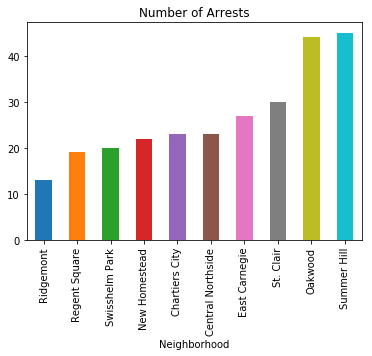

In [4]:
arrestScores = hoodsdict

for key in arrestdict:
    if key in arrestScores:
        arrestScores[key] = arrestdict[key]
        
s = pd.Series(arrestScores, name="Score")
s.index.name = "Neighborhood"
s.sort_values().iloc[0:10].plot('bar', title = 'Number of Arrests')

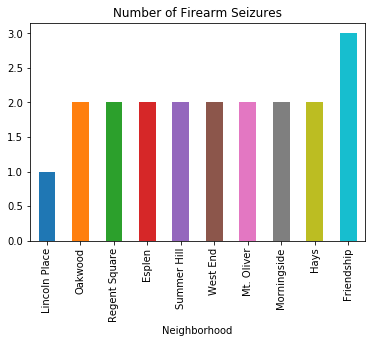

In [5]:
fireScores = hoodsdict

for key in firedict:
    if key in fireScores:
        fireScores[key] = firedict[key]
        
s = pd.Series(fireScores, name="Score")
s.index.name = "Neighborhood"
s.sort_values().iloc[0:10].plot('bar', title = "Number of Firearm Seizures")

Neighborhood
Central Business District    2526
South Side Flats             2230
Carrick                      1506
Homewood South               1341
East Allegheny               1327
Homewood North               1168
East Liberty                 1130
Marshall-Shadeland            997
Mount Washington              976
Bluff                         875
Knoxville                     870
Hazelwood                     820
Brookline                     807
Lincoln-Lemington-Belmar      802
Sheraden                      787
Beechview                     773
Perry South                   752
Brighton Heights              715
Allegheny Center              703
Shadyside                     670
Middle Hill                   660
East Hills                    659
Allentown                     636
Bloomfield                    630
Larimer                       571
Fineview                      548
Crawford-Roberts              534
North Shore                   520
South Side Slopes             518
S

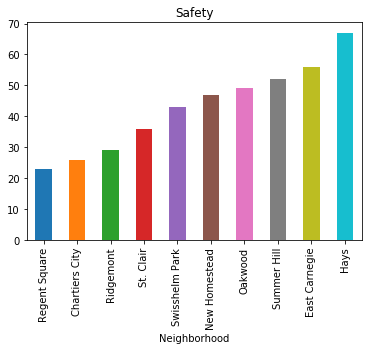

In [6]:
for key in firedict:
    if key in scores:
        scores[key] = firedict[key]

for key in arrestdict:
    if key in scores:
        scores[key] = scores[key] + arrestdict[key]

for key in policedict:
    if key in scores:
        scores[key] = scores[key] + policedict[key]


s = pd.Series(scores, name="Score")
s.index.name = "Neighborhood"
s.sort_values().iloc[0:10].plot('bar', title = 'Safety')
print(s.sort_values(ascending = False).to_string())

Neighborhood
Central Business District    50.000000
South Side Flats             44.140934
Carrick                      29.809976
Homewood South               26.543943
East Allegheny               26.266825
Homewood North               23.119557
East Liberty                 22.367379
Marshall-Shadeland           19.734759
Mount Washington             19.319082
Bluff                        17.319873
Knoxville                    17.220903
Hazelwood                    16.231196
Brookline                    15.973872
Lincoln-Lemington-Belmar     15.874901
Sheraden                     15.577989
Beechview                    15.300871
Perry South                  14.885194
Brighton Heights             14.152811
Allegheny Center             13.915281
Shadyside                    13.262074
Middle Hill                  13.064133
East Hills                   13.044339
Allentown                    12.589074
Bloomfield                   12.470309
Larimer                      11.302454
Fineview    

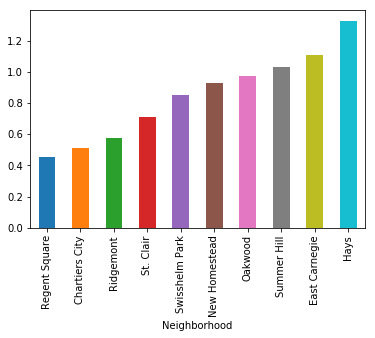

In [7]:
array = list(scores.values())
array.sort(reverse=True)
ratio = 50/array[0]

for key in scores:
    scores[key] = scores[key] * ratio
s = pd.Series(scores, name="Score")
s.index.name = "Neighborhood"
s.sort_values(ascending = True).iloc[0:10].plot('bar') 
print(s.sort_values(ascending = False).to_string())